# Table of Contents
1. [Initial Notes](#Some-things-to-note)
2. Predict DAP Using Stocks and No Lead/Lag
    1. [Exploratory Analysis](#Exploratory-Analysis,-no-lag,-stocks-included)
    2. [MLR Models](#Determining-MLR-Models-to-Use-using-stocks-and-no-lead-or-lag)
    3. [RDF Models](#RDF-Analysis-using-stocks,-no-lead-or-lag)
4. Predict DAP Using 7 Week Lead of Stocks to DAP
 1. [Exploratory Analysis](#Exploratory-Analysis-with-Stocks-Leading-DAP-by-7-Weeks)
 2. [MLR Models](#MLR-Models-First)
 3. [RDF Models](#RDF-analysis,-stocks-included-7-week-lead-in-stocks)
5. Predict DAP Not Using Stocks or Leads
 1. [Exploratory Analysis](#Exploratory-Analysis,-no-stocks,-no-lead-or-lag-of-DAP)
 2. [MLR Models](#MLR-Models)
 3. [RDF Models](#RDF-Analysis-no-stocks,-no-lead-or-lag-in-DAP)
 4. [Average Case](#Avg-Case)
 5. [Best Case](#Best-Case)
 6. [Worst Case](#Worst-Case)

# Some things to note

## This notebook uses assumptions made in the DAP-MAP Predictions May notebook, like lead/lag of the stocks. Also, I decided to use UAN instead of urea now because after looking at Avg, Best, worst cases (no lag or no stocks) looked eratic probably due to the Urea prediction

# Exploratory Analysis, no lag, stocks included
[Top](#Table-of-Contents)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureamorevariables.csv")
df_96onuan = data[['Date','Urea','UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock','DAP']]
print(df_96onuan.tail())
from datetime import datetime
df_96onuan['Date'] = pd.to_datetime(df_96onuan['Date'])
date = df_96onuan['Date']
df_96onuan.dtypes

           Date  Urea     UAN     Phos_Inv  Phos_Exports  Phos_Domestic_Use  \
1060  4/29/2016   232  212.16  568570.4171   139477.8947         308862.647   
1061   5/6/2016   225  209.92  504721.1176   211180.0000         242143.957   
1062  5/13/2016   212  194.88  504721.1176   211180.0000         242143.957   
1063  5/20/2016   200  194.88  504721.1176   211180.0000         242143.957   
1064  5/27/2016   189  190.08  504721.1176   211180.0000         242143.957   

      PCS_Stock  Mosaic_Stock  DAP  
1060      17.72         27.99  325  
1061      15.89         25.99  330  
1062      15.69         24.84  320  
1063      16.53         25.94  311  
1064      16.57         25.69  308  


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Date                 datetime64[ns]
Urea                          int64
UAN                         float64
Phos_Inv                    float64
Phos_Exports                float64
Phos_Domestic_Use           float64
PCS_Stock                   float64
Mosaic_Stock                float64
DAP                           int64
dtype: object

In [2]:
df_96onuan.corr()
#uan has better correlation with DAP

,Urea,UAN,Phos_Inv,Phos_Exports,Phos_Domestic_Use,PCS_Stock,Mosaic_Stock,DAP
Urea,1.000000,0.953353,-0.602952,-0.537962,-0.098647,0.872659,0.764810,0.892002
UAN,0.953353,1.000000,-0.556562,-0.614301,-0.141679,0.887569,0.754556,0.914307
Phos_Inv,-0.602952,-0.556562,1.000000,0.354346,-0.164100,-0.608309,-0.463392,-0.482487
Phos_Exports,-0.537962,-0.614301,0.354346,1.000000,-0.070017,-0.588118,-0.382351,-0.516968
Phos_Domestic_Use,-0.098647,-0.141679,-0.164100,-0.070017,1.000000,-0.127828,-0.071931,-0.153365
PCS_Stock,0.872659,0.887569,-0.608309,-0.588118,-0.127828,1.000000,0.892358,0.903068
Mosaic_Stock,0.764810,0.754556,-0.463392,-0.382351,-0.071931,0.892358,1.000000,0.875757
DAP,0.892002,0.914307,-0.482487,-0.516968,-0.153365,0.903068,0.875757,1.000000


## Determining MLR Models to Use using stocks and no lead or lag
[Top](#Table-of-Contents)

In [3]:
#now get rid of urea nad use uan instead in the analysis, since urea is easier to predict, also the fact that using urea
# I would have to predict DAP using a prediction for urea
df_uan = df_96onuan[['Date','UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock','DAP']]

In [4]:
#full model
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#fit a OLS model with all, see how R^2 changes
X = df_uan[['UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock']]
Y = df_uan[['DAP']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary() #using uan instead of urea increased R^2 from 0.900 to 0.920

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DAP   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     2022.
Date:                Mon, 27 Jun 2016   Prob (F-statistic):               0.00
Time:                        10:54:54   Log-Likelihood:                -5727.1
No. Observations:                1065   AIC:                         1.147e+04
Df Residuals:                    1058   BIC:                         1.150e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const               -51.2274     17.997     -2.846      0.005       -86.542   -15.913
UAN                   1.1766      0.038     31.066      0.000         1.102     1.251
Phos_Inv           7.303e-05   1.52e-05      4.819      0.000      4.33e-05     0.000
Phos_Exports       1.334e-05   1.81e-05      0.735      0.463     -2.23e-05  4.89e-05
Phos_Domestic_Use -5.361e-05   2.24e-05     -2.393      0.017     -9.76e-05 -9.64e-06
PCS_Stock             0.1247      0.340      0.366      0.714        -0.543     0.793
Mosaic_Stock          3.2805      0.171     19.144      0.000         2.944     3.617
==============================================================================
Omnibus:                      186.792   Durbin-Watson:                   0.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              733.348
Skew:                           0.789   Prob(JB):                    5.69e-160
Kurtosis:                       6.746   Cond. No.                     8.31e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy.stats.stats import pearsonr
import numpy as np
from statsmodels import regression
import math
data = df_uan[['UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock']]
response = df_uan['DAP'] # need to have in the series format
Y = np.array(Y)

#forward stepwise regression formula
def forward_aic(response, data):
    # This function will work with pandas dataframes and series
    
    # Initialize some variables
    explanatory = list(data.columns)
    selected = pd.Series(np.ones(data.shape[0]), name="Intercept")
    current_score, best_new_score = np.inf, np.inf
    
    # Loop while we haven't found a better model
    while current_score == best_new_score and len(explanatory) != 0:
        
        scores_with_elements = []
        count = 0
        
        # For each explanatory variable
        for element in explanatory:
            # Make a set of explanatory variables including our current best and the new one
            tmp = pd.concat([selected, data[element]], axis=1)
            # Test the set
            result = regression.linear_model.OLS(Y, tmp).fit()
            score = result.aic
            scores_with_elements.append((score, element, count))
            count += 1
        
        # Sort the scoring list
        scores_with_elements.sort(reverse = True)
        # Get the best new variable
        best_new_score, best_element, index = scores_with_elements.pop()
        if current_score > best_new_score:
            # If it's better than the best add it to the set
            explanatory.pop(index)
            selected = pd.concat([selected, data[best_element]],axis=1)
            current_score = best_new_score
    # Return the final model
    model = regression.linear_model.OLS(Y, selected).fit()
    return model


In [8]:
#results of stepwise regression 
result = forward_aic(Y, data)
result.summary()
 #forward selection has same R^2, 2 less variables, smaller AIC and most important variable is UAN, least important is 
#phos_domestic_use

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     3037.
Date:                Mon, 27 Jun 2016   Prob (F-statistic):               0.00
Time:                        10:55:50   Log-Likelihood:                -5727.4
No. Observations:                1065   AIC:                         1.146e+04
Df Residuals:                    1060   BIC:                         1.149e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept           -42.6603     13.699     -3.114      0.002       -69.541   -15.779
UAN                   1.1720      0.028     41.847      0.000         1.117     1.227
Mosaic_Stock          3.3419      0.101     33.018      0.000         3.143     3.540
Phos_Inv           7.032e-05   1.36e-05      5.165      0.000      4.36e-05   9.7e-05
Phos_Domestic_Use -5.892e-05   2.09e-05     -2.817      0.005       -0.0001 -1.79e-05
==============================================================================
Omnibus:                      185.462   Durbin-Watson:                   0.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              722.501
Skew:                           0.786   Prob(JB):                    1.29e-157
Kurtosis:                       6.717   Cond. No.                     5.64e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
#rfecv choice
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV

X = df_uan[['UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock']]
Y = df_uan[['DAP']]
#order is above
regression = LinearRegression()
selector = RFECV(estimator=regression, cv=10,
   scoring='mean_squared_error')
selector.fit(X, Y)

sfm = SelectFromModel(regression, threshold = 0.25)
print("Optimal number of features: %d" 
   % selector.n_features_)
print ([selector.support_])
print(selector.ranking_)
print(selector) #chooses UAN, and both stocks

Optimal number of features: 3
[array([ True, False, False, False,  True,  True], dtype=bool)]
[1 2 4 3 1 1]
RFECV(cv=10,
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
   estimator_params=None, scoring='mean_squared_error', step=1, verbose=0)


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
#rfecv
X = df_uan[['UAN','PCS_Stock','Mosaic_Stock']]
Y = df_uan[['DAP']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DAP   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     3876.
Date:                Mon, 27 Jun 2016   Prob (F-statistic):               0.00
Time:                        10:56:04   Log-Likelihood:                -5749.2
No. Observations:                1065   AIC:                         1.151e+04
Df Residuals:                    1061   BIC:                         1.153e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const          -11.8285      4.789     -2.470      0.014       -21.226    -2.431
UAN              1.1743      0.038     31.231      0.000         1.101     1.248
PCS_Stock       -0.4734      0.289     -1.638      0.102        -1.041     0.094
Mosaic_Stock     3.4657      0.152     22.789      0.000         3.167     3.764
==============================================================================
Omnibus:                      237.884   Durbin-Watson:                   0.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1029.489
Skew:                           0.985   Prob(JB):                    2.81e-224
Kurtosis:                       7.395   Cond. No.                         621.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## RDF Analysis using stocks, no lead or lag
[Top](#Table-of-Contents)

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = df_uan[['UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock']].values
y = df_uan['DAP'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [13]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on dap/map data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [17]:
#do multiple times to see what parameters are the best
rdf_model_dapall = fit_predict_model(X_train,y_train)
print (rdf_model_dapall.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


## Model 1 = All Variables Used 

In [19]:
X1 = df_uan[['UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock']].values
y1 = df_uan['DAP'].values
X_train1, X_test1, y_train1, y_test1= train_test_split(X1,y1,test_size=0.3,random_state=1)
forest1 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1.fit(X_train1, y_train1)
y_train_pred1= forest1.predict(X_train1)
y_test_pred1= forest1.predict(X_test1)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1, y_train_pred1),mean_squared_error(y_test1, y_test_pred1)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1, y_train_pred1),r2_score(y_test1,y_test_pred1)))
print(forest1.feature_importances_) #urea most important followed by stocks, exports least important

MSE train: 108.303, test: 257.189
R^2 train: 0.997, test: 0.992
[ 0.59904733  0.00888327  0.00841399  0.01179582  0.19810737  0.17375222]


## Model 2 = Forward Selection

In [20]:
#forward selection
X = df_uan[['UAN','Phos_Inv','Phos_Domestic_Use','Mosaic_Stock']].values
y = df_uan['DAP'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [24]:
rdf_model_dapforward = fit_predict_model(X_train,y_train)
print (rdf_model_dapforward.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [25]:
X2 = df_uan[['UAN','Phos_Inv','Phos_Domestic_Use','Mosaic_Stock']].values
y2 = df_uan['DAP'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.3,random_state=1)
forest2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2.fit(X_train2, y_train2)
y_train_pred2 = forest2.predict(X_train2)
y_test_pred2 = forest2.predict(X_test2)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2, y_train_pred2),mean_squared_error(y_test2, y_test_pred2)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2, y_train_pred2),r2_score(y_test2,y_test_pred2)))
print(forest2.feature_importances_)

MSE train: 127.806, test: 455.956
R^2 train: 0.996, test: 0.985
[ 0.754162    0.02670381  0.01515655  0.20397765]


## Model 3 = Top 3/RFECV

In [26]:
#top 3
X = df_uan[['UAN','PCS_Stock','Mosaic_Stock']].values
y = df_uan['DAP'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [32]:
rdf_model_daptop3 = fit_predict_model(X_train,y_train)
print (rdf_model_daptop3.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [33]:
X3 = df_uan[['UAN','PCS_Stock','Mosaic_Stock']].values
y3 = df_uan['DAP'].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.3,random_state=1)
forest3 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3.fit(X_train3, y_train3)
y_train_pred3 = forest3.predict(X_train3)
y_test_pred3 = forest3.predict(X_test3)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3, y_train_pred3),mean_squared_error(y_test3, y_test_pred3)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3, y_train_pred3),r2_score(y_test3,y_test_pred3)))
print(forest3.feature_importances_)

MSE train: 185.912, test: 474.324
R^2 train: 0.995, test: 0.985
[ 0.62770407  0.18442719  0.18786875]


## Model 4 = No corr with UAN

In [34]:
X = df_uan[['UAN','Phos_Domestic_Use']].values
y = df_uan['DAP'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [36]:
rdf_model_dapnocorr= fit_predict_model(X_train,y_train)
print (rdf_model_dapnocorr.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [38]:
X4 = df_uan[['UAN','Phos_Domestic_Use']].values
y4 = df_uan['DAP'].values
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.3,random_state=1)
forest4 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4.fit(X_train4, y_train4)
y_train_pred4 = forest4.predict(X_train4)
y_test_pred4 = forest4.predict(X_test4)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4, y_train_pred4),mean_squared_error(y_test4, y_test_pred4)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4, y_train_pred4),r2_score(y_test4,y_test_pred4)))
print(forest4.feature_importances_)

MSE train: 258.617, test: 780.683
R^2 train: 0.993, test: 0.975
[ 0.91680654  0.08319346]


# Exploratory Analysis with Stocks Leading DAP by 7 Weeks
[Top](#Table-of-Contents)

In [39]:
df_uan['DAP_up7weeks'] = df_uan.DAP.shift(-7) #aic chose this
df_96on7 = df_uan[['Date','UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock','DAP_up7weeks']][0:1058]
df_96on7.tail(2)

,Date,UAN,Phos_Inv,Phos_Exports,Phos_Domestic_Use,PCS_Stock,Mosaic_Stock,DAP_up7weeks
1056,2016-04-01,205.12,568570.4171,139477.8947,308862.647,17.03,26.84,311
1057,2016-04-08,209.92,568570.4171,139477.8947,308862.647,15.96,24.96,308


In [40]:
df_96on7.corr()

,UAN,Phos_Inv,Phos_Exports,Phos_Domestic_Use,PCS_Stock,Mosaic_Stock,DAP_up7weeks
UAN,1.000000,-0.556594,-0.615814,-0.142045,0.888007,0.755493,0.877449
Phos_Inv,-0.556594,1.000000,0.353517,-0.164595,-0.609335,-0.465036,-0.563510
Phos_Exports,-0.615814,0.353517,1.000000,-0.068850,-0.592395,-0.387329,-0.495298
Phos_Domestic_Use,-0.142045,-0.164595,-0.068850,1.000000,-0.127879,-0.071851,-0.101630
PCS_Stock,0.888007,-0.609335,-0.592395,-0.127879,1.000000,0.892430,0.919980
Mosaic_Stock,0.755493,-0.465036,-0.387329,-0.071851,0.892430,1.000000,0.910042
DAP_up7weeks,0.877449,-0.563510,-0.495298,-0.101630,0.919980,0.910042,1.000000


## MLR Models First

In [41]:
X = df_96on7[['UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock']]
Y = df_96on7[['DAP_up7weeks']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DAP_up7weeks   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     1922.
Date:                Mon, 27 Jun 2016   Prob (F-statistic):               0.00
Time:                        11:32:52   Log-Likelihood:                -5713.4
No. Observations:                1058   AIC:                         1.144e+04
Df Residuals:                    1051   BIC:                         1.148e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                74.2499     18.524      4.008      0.000        37.902   110.598
UAN                   0.7227      0.039     18.646      0.000         0.647     0.799
Phos_Inv          -8.015e-05   1.55e-05     -5.156      0.000        -0.000 -4.96e-05
Phos_Exports       1.663e-05   1.87e-05      0.888      0.375     -2.01e-05  5.33e-05
Phos_Domestic_Use -2.185e-05    2.3e-05     -0.952      0.341     -6.69e-05  2.32e-05
PCS_Stock             0.8436      0.349      2.414      0.016         0.158     1.529
Mosaic_Stock          3.9902      0.175     22.747      0.000         3.646     4.334
==============================================================================
Omnibus:                      258.685   Durbin-Watson:                   0.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1291.867
Skew:                           1.038   Prob(JB):                    2.98e-281
Kurtosis:                       7.999   Cond. No.                     8.34e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
#forward selection stepwise, I already executed definition in above section
data = df_96on7[['UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock']]
response = df_96on7['DAP_up7weeks'] # need to have in the series format
Y = np.array(Y)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy.stats.stats import pearsonr
import numpy as np
from statsmodels import regression
import math
#forward stepwise regression formula
def forward_aic(response, data):
    # This function will work with pandas dataframes and series
    
    # Initialize some variables
    explanatory = list(data.columns)
    selected = pd.Series(np.ones(data.shape[0]), name="Intercept")
    current_score, best_new_score = np.inf, np.inf
    
    # Loop while we haven't found a better model
    while current_score == best_new_score and len(explanatory) != 0:
        
        scores_with_elements = []
        count = 0
        
        # For each explanatory variable
        for element in explanatory:
            # Make a set of explanatory variables including our current best and the new one
            tmp = pd.concat([selected, data[element]], axis=1)
            # Test the set
            result = regression.linear_model.OLS(Y, tmp).fit()
            score = result.aic
            scores_with_elements.append((score, element, count))
            count += 1
        
        # Sort the scoring list
        scores_with_elements.sort(reverse = True)
        # Get the best new variable
        best_new_score, best_element, index = scores_with_elements.pop()
        if current_score > best_new_score:
            # If it's better than the best add it to the set
            explanatory.pop(index)
            selected = pd.concat([selected, data[best_element]],axis=1)
            current_score = best_new_score
    # Return the final model
    model = regression.linear_model.OLS(Y, selected).fit()
    return model
result = forward_aic(Y, data)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     2882.
Date:                Mon, 27 Jun 2016   Prob (F-statistic):               0.00
Time:                        11:33:11   Log-Likelihood:                -5714.6
No. Observations:                1058   AIC:                         1.144e+04
Df Residuals:                    1053   BIC:                         1.146e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       72.6811     10.649      6.825      0.000        51.785    93.577
PCS_Stock        0.7893      0.311      2.541      0.011         0.180     1.399
Mosaic_Stock     4.0234      0.156     25.727      0.000         3.717     4.330
UAN              0.7177      0.038     18.989      0.000         0.644     0.792
Phos_Inv     -7.648e-05   1.43e-05     -5.355      0.000        -0.000 -4.85e-05
==============================================================================
Omnibus:                      257.432   Durbin-Watson:                   0.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1265.394
Skew:                           1.038   Prob(JB):                    1.67e-275
Kurtosis:                       7.939   Cond. No.                     3.94e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
#rfecv
X = df_96on7[['UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock']]
Y = df_96on7[['DAP_up7weeks']]
#order is above
regression = LinearRegression()
selector = RFECV(estimator=regression, cv=10,
   scoring='mean_squared_error')
selector.fit(X, Y)

sfm = SelectFromModel(regression, threshold = 0.25)
print("Optimal number of features: %d" 
   % selector.n_features_)
print ([selector.support_])
print(selector.ranking_)
print(selector) #same choice as when there was no lead, analysis above

Optimal number of features: 3
[array([ True, False, False, False,  True,  True], dtype=bool)]
[1 2 4 3 1 1]
RFECV(cv=10,
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
   estimator_params=None, scoring='mean_squared_error', step=1, verbose=0)


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
#rfecv top3
X = df_96on7[['UAN','PCS_Stock','Mosaic_Stock']]
Y = df_96on7[['DAP_up7weeks']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DAP_up7weeks   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     3735.
Date:                Mon, 27 Jun 2016   Prob (F-statistic):               0.00
Time:                        11:36:31   Log-Likelihood:                -5728.8
No. Observations:                1058   AIC:                         1.147e+04
Df Residuals:                    1054   BIC:                         1.149e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           21.7952      4.869      4.476      0.000        12.241    31.349
UAN              0.7184      0.038     18.763      0.000         0.643     0.793
PCS_Stock        1.3830      0.294      4.705      0.000         0.806     1.960
Mosaic_Stock     3.8423      0.155     24.841      0.000         3.539     4.146
==============================================================================
Omnibus:                      261.045   Durbin-Watson:                   0.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1345.348
Skew:                           1.039   Prob(JB):                    7.27e-293
Kurtosis:                       8.119   Cond. No.                         620.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#no corr to each other using pcs since most important according to stepwise
X = df_96on7[['Phos_Domestic_Use','PCS_Stock']]
Y = df_96on7[['DAP_up7weeks']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DAP_up7weeks   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     2912.
Date:                Mon, 27 Jun 2016   Prob (F-statistic):               0.00
Time:                        11:38:03   Log-Likelihood:                -6035.0
No. Observations:                1058   AIC:                         1.208e+04
Df Residuals:                    1055   BIC:                         1.209e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const               122.3819      8.254     14.827      0.000       106.186   138.578
Phos_Domestic_Use    3.7e-05   2.76e-05      1.339      0.181     -1.72e-05  9.12e-05
PCS_Stock             9.3515      0.123     75.845      0.000         9.110     9.593
==============================================================================
Omnibus:                      461.288   Durbin-Watson:                   0.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3782.449
Skew:                           1.802   Prob(JB):                         0.00
Kurtosis:                      11.533   Cond. No.                     1.01e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## RDF analysis, stocks included 7 week lead in stocks
[Top](#Table-of-Contents)

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = df_96on7[['UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock']].values
y = df_96on7['DAP_up7weeks'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [51]:
#do multiple times to see what parameters are the best
rdf_model_dapall = fit_predict_model(X_train,y_train)
print (rdf_model_dapall.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


## Model 1 = All variables

In [52]:
X1_7 = df_96on7[['UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use','PCS_Stock','Mosaic_Stock']].values
y1_7 = df_96on7['DAP_up7weeks'].values
X_train1_7, X_test1_7, y_train1_7, y_test1_7= train_test_split(X1_7,y1_7,test_size=0.3,random_state=1)
forest1_7 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1_7.fit(X_train1_7, y_train1_7)
y_train_pred1_7= forest1_7.predict(X_train1_7)
y_test_pred1_7= forest1_7.predict(X_test1_7)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1_7, y_train_pred1_7),mean_squared_error(y_test1_7, y_test_pred1_7)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1_7, y_train_pred1_7),r2_score(y_test1_7,y_test_pred1_7)))
print(forest1_7.feature_importances_) #urea is still most important however not as much as before

MSE train: 94.403, test: 357.034
R^2 train: 0.997, test: 0.991
[ 0.24574795  0.01263056  0.00663277  0.0061204   0.48693321  0.24193511]


## Model 2 = RFECV/ Top 3

In [53]:
#top 3
X = df_96on7[['UAN','PCS_Stock','Mosaic_Stock']].values
y = df_96on7['DAP_up7weeks'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [58]:
rdf_model_daptop3 = fit_predict_model(X_train,y_train)
print (rdf_model_daptop3.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [60]:
X2_7 = df_96on7[['UAN','PCS_Stock','Mosaic_Stock']].values
y2_7 = df_96on7['DAP_up7weeks'].values
X_train2_7, X_test2_7, y_train2_7, y_test2_7 = train_test_split(X2_7,y2_7,test_size=0.3,random_state=1)
forest2_7 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2_7.fit(X_train2_7, y_train2_7)
y_train_pred2_7 = forest2_7.predict(X_train2_7)
y_test_pred2_7 = forest2_7.predict(X_test2_7)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2_7, y_train_pred2_7),mean_squared_error(y_test2_7, y_test_pred2_7)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2_7, y_train_pred2_7),r2_score(y_test2_7,y_test_pred2_7)))
print(forest2_7.feature_importances_)

MSE train: 221.074, test: 658.301
R^2 train: 0.993, test: 0.983
[ 0.25687152  0.496705    0.24642347]


## Model 3 = Top4/Forward Selection

In [62]:
#top 4
X = df_96on7[['UAN','Phos_Inv','PCS_Stock','Mosaic_Stock']].values
y = df_96on7['DAP_up7weeks'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [66]:
rdf_model_daptop4 = fit_predict_model(X_train,y_train)
print (rdf_model_daptop4.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [67]:
X3_7 = df_96on7[['UAN','Phos_Inv','PCS_Stock','Mosaic_Stock']].values
y3_7 = df_96on7['DAP_up7weeks'].values
X_train3_7, X_test3_7, y_train3_7, y_test3_7 = train_test_split(X3_7,y3_7,test_size=0.3,random_state=1)
forest3_7 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3_7.fit(X_train3_7, y_train3_7)
y_train_pred3_7 = forest3_7.predict(X_train3_7)
y_test_pred3_7 = forest3_7.predict(X_test3_7)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3_7, y_train_pred3_7),mean_squared_error(y_test3_7, y_test_pred3_7)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3_7, y_train_pred3_7),r2_score(y_test3_7,y_test_pred3_7)))
print(forest3_7.feature_importances_)

MSE train: 122.816, test: 405.776
R^2 train: 0.996, test: 0.990
[ 0.27303161  0.01677103  0.46976209  0.24043527]


## Model 4 = pcs and domestic

In [68]:
X = df_96on7[['Phos_Domestic_Use','PCS_Stock']].values
y = df_96on7['DAP_up7weeks'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [72]:
rdf_model_dappcsdom = fit_predict_model(X_train,y_train)
print (rdf_model_dappcsdom.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [75]:
X4_7 = df_96on7[['Phos_Domestic_Use','PCS_Stock']].values
y4_7 = df_96on7['DAP_up7weeks'].values
X_train4_7, X_test4_7, y_train4_7, y_test4_7 = train_test_split(X4_7,y4_7,test_size=0.3,random_state=1)
forest4_7 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4_7.fit(X_train4_7, y_train4_7)
y_train_pred4_7 = forest4_7.predict(X_train4_7)
y_test_pred4_7 = forest4_7.predict(X_test4_7)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4_7, y_train_pred4_7),mean_squared_error(y_test4_7, y_test_pred4_7)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4_7, y_train_pred4_7),r2_score(y_test4_7,y_test_pred4_7)))
print(forest4_7.feature_importances_)

MSE train: 379.931, test: 2459.870
R^2 train: 0.988, test: 0.936
[ 0.05929395  0.94070605]


# Exploratory Analysis, no stocks, no lead or lag of DAP
[Top](#Table-of-Contents)

In [77]:
df_nostock = df_uan[['Date','UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use','DAP']]
df_nostock.corr() #uan and exports are only thing correlated to DAP

,UAN,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP
UAN,1.000000,-0.556562,-0.614301,-0.141679,0.914307
Phos_Inv,-0.556562,1.000000,0.354346,-0.164100,-0.482487
Phos_Exports,-0.614301,0.354346,1.000000,-0.070017,-0.516968
Phos_Domestic_Use,-0.141679,-0.164100,-0.070017,1.000000,-0.153365
DAP,0.914307,-0.482487,-0.516968,-0.153365,1.000000


## MLR Models 

In [79]:
X = df_nostock[['UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use']]
Y = df_nostock[['DAP']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary() #phos_domestic use p value too large

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DAP   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     1393.
Date:                Mon, 27 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:13:46   Log-Likelihood:                -6094.3
No. Observations:                1065   AIC:                         1.220e+04
Df Residuals:                    1060   BIC:                         1.222e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const               -82.6766     23.517     -3.516      0.000      -128.822   -36.531
UAN                   1.8740      0.036     52.301      0.000         1.804     1.944
Phos_Inv           4.392e-05   1.92e-05      2.288      0.022      6.26e-06  8.16e-05
Phos_Exports          0.0001   2.29e-05      4.400      0.000      5.58e-05     0.000
Phos_Domestic_Use   -9.8e-06   3.01e-05     -0.325      0.745      -6.9e-05  4.94e-05
==============================================================================
Omnibus:                      336.646   Durbin-Watson:                   0.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1971.034
Skew:                           1.325   Prob(JB):                         0.00
Kurtosis:                       9.115   Cond. No.                     7.70e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.7e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
#forward selection stepwise, I already executed definition in above section
data = df_nostock[['UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use']]
response = df_nostock['DAP'] # need to have in the series format
Y = np.array(Y)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy.stats.stats import pearsonr
import numpy as np
from statsmodels import regression
import math
#forward stepwise regression formula
def forward_aic(response, data):
    # This function will work with pandas dataframes and series
    
    # Initialize some variables
    explanatory = list(data.columns)
    selected = pd.Series(np.ones(data.shape[0]), name="Intercept")
    current_score, best_new_score = np.inf, np.inf
    
    # Loop while we haven't found a better model
    while current_score == best_new_score and len(explanatory) != 0:
        
        scores_with_elements = []
        count = 0
        
        # For each explanatory variable
        for element in explanatory:
            # Make a set of explanatory variables including our current best and the new one
            tmp = pd.concat([selected, data[element]], axis=1)
            # Test the set
            result = regression.linear_model.OLS(Y, tmp).fit()
            score = result.aic
            scores_with_elements.append((score, element, count))
            count += 1
        
        # Sort the scoring list
        scores_with_elements.sort(reverse = True)
        # Get the best new variable
        best_new_score, best_element, index = scores_with_elements.pop()
        if current_score > best_new_score:
            # If it's better than the best add it to the set
            explanatory.pop(index)
            selected = pd.concat([selected, data[best_element]],axis=1)
            current_score = best_new_score
    # Return the final model
    model = regression.linear_model.OLS(Y, selected).fit()
    return model
result = forward_aic(Y, data)
result.summary() #uan most important got rid of domestic

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     1858.
Date:                Mon, 27 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:14:39   Log-Likelihood:                -6094.4
No. Observations:                1065   AIC:                         1.220e+04
Df Residuals:                    1061   BIC:                         1.222e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      -87.5919     18.003     -4.865      0.000      -122.917   -52.267
UAN              1.8780      0.034     55.870      0.000         1.812     1.944
Phos_Exports     0.0001   2.24e-05      4.565      0.000      5.83e-05     0.000
Phos_Inv      4.577e-05   1.83e-05      2.499      0.013      9.84e-06  8.17e-05
==============================================================================
Omnibus:                      335.247   Durbin-Watson:                   0.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1962.290
Skew:                           1.319   Prob(JB):                         0.00
Kurtosis:                       9.104   Cond. No.                     5.54e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
#rfecv
X = df_nostock[['UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use']]
Y = df_nostock[['DAP']]
#order is above
regression = LinearRegression()
selector = RFECV(estimator=regression, cv=10,
   scoring='mean_squared_error')
selector.fit(X, Y)

sfm = SelectFromModel(regression, threshold = 0.25)
print("Optimal number of features: %d" 
   % selector.n_features_)
print ([selector.support_])
print(selector.ranking_)
print(selector) #according to this only uan is important in the model

Optimal number of features: 1
[array([ True, False, False, False], dtype=bool)]
[1 3 2 4]
RFECV(cv=10,
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
   estimator_params=None, scoring='mean_squared_error', step=1, verbose=0)


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [83]:
#rfecv
X = df_nostock[['UAN']]
Y = df_nostock[['DAP']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DAP   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     5417.
Date:                Mon, 27 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:15:56   Log-Likelihood:                -6108.0
No. Observations:                1065   AIC:                         1.222e+04
Df Residuals:                    1063   BIC:                         1.223e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -3.9131      4.946     -0.791      0.429       -13.619     5.793
UAN            1.7548      0.024     73.600      0.000         1.708     1.802
==============================================================================
Omnibus:                      393.649   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2485.521
Skew:                           1.560   Prob(JB):                         0.00
Kurtosis:                       9.802   Cond. No.                         447.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
#no corr
X = df_nostock[['UAN','Phos_Domestic_Use']]
Y = df_nostock[['DAP']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary() #only goes up 0.01 R^2 adding it to uan alone, can't use too big of p value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DAP   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     2717.
Date:                Mon, 27 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:16:35   Log-Likelihood:                -6106.2
No. Observations:                1065   AIC:                         1.222e+04
Df Residuals:                    1062   BIC:                         1.223e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                11.7973      9.486      1.244      0.214        -6.815    30.410
UAN                   1.7482      0.024     72.678      0.000         1.701     1.795
Phos_Domestic_Use -5.526e-05   2.85e-05     -1.940      0.053        -0.000   6.3e-07
==============================================================================
Omnibus:                      395.783   Durbin-Watson:                   0.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2505.632
Skew:                           1.569   Prob(JB):                         0.00
Kurtosis:                       9.827   Cond. No.                     1.14e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# RDF Analysis no stocks, no lead or lag in DAP
[Top](#Table-of-Contents)

In [85]:
X = df_nostock[['UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use']].values
y = df_nostock['DAP'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [90]:
#do multiple times to see what parameters are the best
rdf_model_dapall = fit_predict_model(X_train,y_train)
print (rdf_model_dapall.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


## Model 1 = All variables

In [91]:
X1_nostock = df_nostock[['UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use']].values
y1_nostock = df_nostock['DAP'].values
X_train1_nostock, X_test1_nostock, y_train1_nostock, y_test1_nostock= train_test_split(X1_nostock,y1_nostock,test_size=0.3,random_state=1)
forest1_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1_nostock.fit(X_train1_nostock, y_train1_nostock)
y_train_pred1_nostock= forest1_nostock.predict(X_train1_nostock)
y_test_pred1_nostock= forest1_nostock.predict(X_test1_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1_nostock, y_train_pred1_nostock),mean_squared_error(y_test1_nostock, y_test_pred1_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1_nostock, y_train_pred1_nostock),r2_score(y_test1_nostock,y_test_pred1_nostock)))
print(forest1_nostock.feature_importances_) #uan dominates and domestic use is the least important

MSE train: 162.389, test: 489.561
R^2 train: 0.995, test: 0.984
[ 0.90366911  0.02778536  0.02945212  0.03909341]


## Model 2 = no domestic use/forward/top3

In [93]:
X = df_nostock[['UAN','Phos_Inv','Phos_Exports']].values
y = df_nostock['DAP'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [95]:
#do multiple times to see what parameters are the best
rdf_model_dapnodom = fit_predict_model(X_train,y_train)
print (rdf_model_dapnodom.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [96]:
X2_nostock = df_nostock[['UAN','Phos_Inv','Phos_Exports']].values
y2_nostock = df_nostock['DAP'].values
X_train2_nostock, X_test2_nostock, y_train2_nostock, y_test2_nostock= train_test_split(X2_nostock,y2_nostock,test_size=0.3,random_state=1)
forest2_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2_nostock.fit(X_train2_nostock, y_train2_nostock)
y_train_pred2_nostock= forest2_nostock.predict(X_train2_nostock)
y_test_pred2_nostock= forest2_nostock.predict(X_test2_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2_nostock, y_train_pred2_nostock),mean_squared_error(y_test2_nostock, y_test_pred2_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2_nostock, y_train_pred2_nostock),r2_score(y_test2_nostock,y_test_pred2_nostock)))
print(forest2_nostock.feature_importances_)

MSE train: 227.472, test: 525.471
R^2 train: 0.994, test: 0.983
[ 0.91025951  0.04510464  0.04463585]


## Model 3 = RFECV, just UAN

In [97]:
X = df_nostock[['UAN']].values
y = df_nostock['DAP'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [101]:
#do multiple times to see what parameters are the best
rdf_model_dapuan = fit_predict_model(X_train,y_train)
print (rdf_model_dapuan.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [102]:
X3_nostock = df_nostock[['UAN']].values
y3_nostock = df_nostock['DAP'].values
X_train3_nostock, X_test3_nostock, y_train3_nostock, y_test3_nostock= train_test_split(X3_nostock,y3_nostock,test_size=0.3,random_state=1)
forest3_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3_nostock.fit(X_train3_nostock, y_train3_nostock)
y_train_pred3_nostock= forest3_nostock.predict(X_train3_nostock)
y_test_pred3_nostock= forest3_nostock.predict(X_test3_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3_nostock, y_train_pred3_nostock),mean_squared_error(y_test3_nostock, y_test_pred3_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3_nostock, y_train_pred3_nostock),r2_score(y_test3_nostock,y_test_pred3_nostock)))
print(forest3_nostock.feature_importances_)

MSE train: 2891.129, test: 2892.428
R^2 train: 0.918, test: 0.908
[ 1.]


## Model 4 = no correlation between x variables

In [103]:
X = df_nostock[['UAN','Phos_Domestic_Use']].values
y = df_nostock['DAP'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [106]:
#do multiple times to see what parameters are the best
rdf_model_dapnocorr = fit_predict_model(X_train,y_train)
print (rdf_model_dapnocorr.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [107]:
X4_nostock = df_nostock[['UAN','Phos_Domestic_Use']].values
y4_nostock = df_nostock['DAP'].values
X_train4_nostock, X_test4_nostock, y_train4_nostock, y_test4_nostock= train_test_split(X4_nostock,y4_nostock,test_size=0.3,random_state=1)
forest4_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4_nostock.fit(X_train4_nostock, y_train4_nostock)
y_train_pred4_nostock= forest4_nostock.predict(X_train4_nostock)
y_test_pred4_nostock= forest4_nostock.predict(X_test4_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4_nostock, y_train_pred4_nostock),mean_squared_error(y_test4_nostock, y_test_pred4_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4_nostock, y_train_pred4_nostock),r2_score(y_test4_nostock,y_test_pred4_nostock)))
print(forest4_nostock.feature_importances_)

MSE train: 234.473, test: 760.869
R^2 train: 0.993, test: 0.976
[ 0.91737948  0.08262052]


# Summary there will be a document that summarizes all the models in every section
## Next I will actually predict future values, however I would like future predictions for PCS and Mosaic since those two stocks are important in modeling DAP

# Future Predictions using No stocks or leads/lags

# Avg Case
[Top](#Table-of-Contents)

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/DAPmayavg.csv")
df_nostock = data[['Date','UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use','DAP']][0:1065]
df_nostock.tail()
#1/5/1996 - 5/27/2016

,Date,UAN,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP
1060,4/29/2016,212.16,568570.4171,139477.8947,308862.647,325
1061,5/6/2016,209.92,504721.1176,211180.0000,242143.957,330
1062,5/13/2016,194.88,504721.1176,211180.0000,242143.957,320
1063,5/20/2016,194.88,504721.1176,211180.0000,242143.957,311
1064,5/27/2016,190.08,504721.1176,211180.0000,242143.957,308


In [111]:
from datetime import datetime
df_nostock['Date'] = pd.to_datetime(df_nostock['Date'])
date = df_nostock['Date']
print (df_nostock.dtypes)
df_nostock.describe()

Date                 datetime64[ns]
UAN                         float64
Phos_Inv                    float64
Phos_Exports                float64
Phos_Domestic_Use           float64
DAP                         float64
dtype: object


,UAN,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000
mean,183.728826,592872.991634,331393.061376,262331.544877,318.488263
std,96.415215,149325.503909,128496.751265,81424.770029,185.043178
min,58.000000,262900.000000,66943.220000,23156.400000,135.000000
25%,101.200000,482900.000000,235759.760000,211781.780000,184.000000
50%,165.200000,581000.000000,325936.420000,258685.232400,233.000000
75%,256.960000,687000.000000,421719.180000,310977.860000,430.000000
max,514.880000,960960.000000,741042.900000,639856.640000,1095.000000


## MLR models I will use found in exploratory analysis, I will use all RDF models

In [112]:
#model 1
X1_nostock = df_nostock[['UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use']].values
y1_nostock = df_nostock['DAP'].values
X_train1_nostock, X_test1_nostock, y_train1_nostock, y_test1_nostock= train_test_split(X1_nostock,y1_nostock,test_size=0.3,random_state=1)
forest1_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1_nostock.fit(X_train1_nostock, y_train1_nostock)
y_train_pred1_nostock= forest1_nostock.predict(X_train1_nostock)
y_test_pred1_nostock= forest1_nostock.predict(X_test1_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1_nostock, y_train_pred1_nostock),mean_squared_error(y_test1_nostock, y_test_pred1_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1_nostock, y_train_pred1_nostock),r2_score(y_test1_nostock,y_test_pred1_nostock)))
print(forest1_nostock.feature_importances_)

MSE train: 162.033, test: 527.877
R^2 train: 0.995, test: 0.983
[ 0.90140972  0.02612947  0.03328684  0.03917397]


In [113]:
#model 2
X2_nostock = df_nostock[['UAN','Phos_Inv','Phos_Exports']].values
y2_nostock = df_nostock['DAP'].values
X_train2_nostock, X_test2_nostock, y_train2_nostock, y_test2_nostock= train_test_split(X2_nostock,y2_nostock,test_size=0.3,random_state=1)
forest2_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2_nostock.fit(X_train2_nostock, y_train2_nostock)
y_train_pred2_nostock= forest2_nostock.predict(X_train2_nostock)
y_test_pred2_nostock= forest2_nostock.predict(X_test2_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2_nostock, y_train_pred2_nostock),mean_squared_error(y_test2_nostock, y_test_pred2_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2_nostock, y_train_pred2_nostock),r2_score(y_test2_nostock,y_test_pred2_nostock)))
print(forest2_nostock.feature_importances_)

MSE train: 233.204, test: 554.259
R^2 train: 0.993, test: 0.982
[ 0.90896738  0.04559453  0.04543809]


In [114]:
#model 3
X3_nostock = df_nostock[['UAN']].values
y3_nostock = df_nostock['DAP'].values
X_train3_nostock, X_test3_nostock, y_train3_nostock, y_test3_nostock= train_test_split(X3_nostock,y3_nostock,test_size=0.3,random_state=1)
forest3_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3_nostock.fit(X_train3_nostock, y_train3_nostock)
y_train_pred3_nostock= forest3_nostock.predict(X_train3_nostock)
y_test_pred3_nostock= forest3_nostock.predict(X_test3_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3_nostock, y_train_pred3_nostock),mean_squared_error(y_test3_nostock, y_test_pred3_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3_nostock, y_train_pred3_nostock),r2_score(y_test3_nostock,y_test_pred3_nostock)))
print(forest3_nostock.feature_importances_)

MSE train: 2893.346, test: 2889.359
R^2 train: 0.918, test: 0.908
[ 1.]


In [115]:
#model 4
X4_nostock = df_nostock[['UAN','Phos_Domestic_Use']].values
y4_nostock = df_nostock['DAP'].values
X_train4_nostock, X_test4_nostock, y_train4_nostock, y_test4_nostock= train_test_split(X4_nostock,y4_nostock,test_size=0.3,random_state=1)
forest4_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4_nostock.fit(X_train4_nostock, y_train4_nostock)
y_train_pred4_nostock= forest4_nostock.predict(X_train4_nostock)
y_test_pred4_nostock= forest4_nostock.predict(X_test4_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4_nostock, y_train_pred4_nostock),mean_squared_error(y_test4_nostock, y_test_pred4_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4_nostock, y_train_pred4_nostock),r2_score(y_test4_nostock,y_test_pred4_nostock)))
print(forest4_nostock.feature_importances_)

MSE train: 240.763, test: 782.356
R^2 train: 0.993, test: 0.975
[ 0.91811205  0.08188795]


In [118]:
# comparing models that will be used
model1 = forest1_nostock.predict(X1_nostock)
model2 = forest2_nostock.predict(X2_nostock)
model3 = forest3_nostock.predict(X3_nostock)
model4 = forest4_nostock.predict(X4_nostock)
model1 = pd.DataFrame(model1)
model2 = pd.DataFrame(model2)
model3 = pd.DataFrame(model3)
model4 = pd.DataFrame(model4)
mlr1 = -86.6766 + (df_nostock['UAN']*1.8740) + (df_nostock['Phos_Inv']*0.00004392) + (df_nostock['Phos_Exports']*0.0001) - (df_nostock['Phos_Domestic_Use']*0.0000098)
mlr2 = -87.5919 + (df_nostock['UAN']*1.8780) + (df_nostock['Phos_Inv']*0.00004577) + (df_nostock['Phos_Exports']*0.0001)
mlr3 = -3.9131 + (df_nostock['UAN']*1.7548)
df_nostock['MLR1'] = mlr1
df_nostock['MLR2'] = mlr2
df_nostock['MLR3'] = mlr3
df_nostock['Model1'] = model1
df_nostock['Model2'] = model2
df_nostock['Model3'] = model3
df_nostock['Model4'] = model4

df_nostock.head(3)

,Date,UAN,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP,MLR1,MLR2,MLR3,Model1,Model2,Model3,Model4
0,1996-01-05,114.00,599737.1134,464050.9,359287.8629,230,196.183923,200.355158,196.134100,210.690588,205.614940,191.645560,207.275322
1,1996-01-12,114.96,599737.1134,464050.9,359287.8629,228,197.982963,202.158038,197.818708,213.411718,209.636476,197.165843,214.514338
2,1996-01-19,114.96,599737.1134,464050.9,359287.8629,228,197.982963,202.158038,197.818708,213.411718,209.636476,197.165843,214.514338


### Predictions Part

In [119]:
#predictions section 6/3/2016 - 12/25/2020
newpred = data[['Date','UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use']][1065:1304]
newpred1 = data [['UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use']][1065:1304]  #goes with model 1
newpred2 = data[['UAN','Phos_Inv','Phos_Exports']][1065:1304] #goes with model 2 
newpred3 = data[['UAN']][1065:1304] #goes with model 3
newpred4 = data[['UAN','Phos_Domestic_Use']][1065:1304] #goes with model 4
print(newpred.tail(3))
newpred1.head(2)

            Date         UAN     Phos_Inv  Phos_Exports  Phos_Domestic_Use
1301  12/11/2020  227.310501  549817.8856   158105.9471        237428.0238
1302  12/18/2020  229.308198  549817.8856   158105.9471        237428.0238
1303  12/25/2020  227.229482  549817.8856   158105.9471        237428.0238


,UAN,Phos_Inv,Phos_Exports,Phos_Domestic_Use
1065,195.01519,495480.0717,266955,119197.0048
1066,195.22895,495480.0717,266955,119197.0048


In [120]:
newpred = np.array(newpred)
newpred = pd.DataFrame(newpred)
newpred.columns = ['Date','UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use'] #all variables used except dap
newpred['Date'] = pd.to_datetime(newpred['Date'])
print(newpred.dtypes)
newpred.head()

Date                 datetime64[ns]
UAN                          object
Phos_Inv                     object
Phos_Exports                 object
Phos_Domestic_Use            object
dtype: object


,Date,UAN,Phos_Inv,Phos_Exports,Phos_Domestic_Use
0,2016-06-03,195.015,495480,266955,119197
1,2016-06-10,195.229,495480,266955,119197
2,2016-06-17,194.932,495480,266955,119197
3,2016-06-24,196.031,495480,266955,119197
4,2016-07-01,196.892,495480,266955,119197


In [121]:
# model 1-4 and mLR models
newpred_predicted1 = forest1_nostock.predict(newpred1)
df_new_pred1 = pd.DataFrame(newpred_predicted1)
newpred['Model1'] = df_new_pred1

newpred_predicted2 = forest2_nostock.predict(newpred2)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred['Model2'] = df_new_pred2

newpred_predicted3 = forest3_nostock.predict(newpred3)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred['Model3'] = df_new_pred3

newpred_predicted4 = forest4_nostock.predict(newpred4)
df_new_pred4 = pd.DataFrame(newpred_predicted4)
newpred['Model4'] = df_new_pred4

mlrpredicted1 = -86.6766 + (newpred['UAN']*1.8740) + (newpred['Phos_Inv']*0.00004392) + (newpred['Phos_Exports']*0.0001) - (newpred['Phos_Domestic_Use']*0.0000098)
mlrpredicted2 = -87.5919 + (newpred['UAN']*1.8780) + (newpred['Phos_Inv']*0.00004577) + (newpred['Phos_Exports']*0.0001)
mlrpredicted3 = -3.9131 + (newpred['UAN']*1.7548)

newpred['MLR1'] = mlrpredicted1
newpred['MLR2'] = mlrpredicted2
newpred['MLR3'] = mlrpredicted3

newpred.head(2)

,Date,UAN,Phos_Inv,Phos_Exports,Phos_Domestic_Use,Model1,Model2,Model3,Model4,MLR1,MLR2,MLR3
0,2016-06-03,195.015,495480,266955,119197,385.69,291.082108,325.008884,361.3475,326.071,328.02,338.3
1,2016-06-10,195.229,495480,266955,119197,386.86,291.546108,325.008884,362.3175,326.471,328.422,338.675


In [122]:
frames = [df_nostock,newpred]
combined = pd.concat(frames)
combined.tail(2)

,DAP,Date,MLR1,MLR2,MLR3,Model1,Model2,Model3,Model4,Phos_Domestic_Use,Phos_Exports,Phos_Inv,UAN
237,NaN,2020-12-18,380.679,384.025,398.477,412.877042,399.408851,363.656855,381.457400,237428,158106,549818,229.308
238,NaN,2020-12-25,376.783,380.121,394.829,412.646208,399.459098,362.575522,393.033843,237428,158106,549818,227.229


In [123]:
combined = combined[['Date','UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use','DAP','Model1','Model2','Model3','Model4','MLR1','MLR2','MLR3']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use','DAP','Model1','Model2','Model3','Model4','MLR1','MLR2','MLR3']
combined

,Date,UAN,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP,Model1,Model2,Model3,Model4,MLR1,MLR2,MLR3
0,1996-01-05 00:00:00,114,599737,464051,359288,230,210.691,205.615,191.646,207.275,196.184,200.355,196.134
1,1996-01-12 00:00:00,114.96,599737,464051,359288,228,213.412,209.636,197.166,214.514,197.983,202.158,197.819
2,1996-01-19 00:00:00,114.96,599737,464051,359288,228,213.412,209.636,197.166,214.514,197.983,202.158,197.819
3,1996-01-26 00:00:00,115.6,599737,464051,359288,227,206.994,204.452,191.45,206.792,199.182,203.36,198.942
4,1996-02-02 00:00:00,117.2,721480,380515,183702,227,214.535,208.607,193.023,222.127,200.895,203.583,201.749
5,1996-02-09 00:00:00,117.2,721480,380515,183702,227,214.535,208.607,193.023,222.127,200.895,203.583,201.749
6,1996-02-16 00:00:00,117.2,721480,380515,183702,228,214.535,208.607,193.023,222.127,200.895,203.583,201.749
7,1996-02-23 00:00:00,117.2,721480,380515,183702,228,214.535,208.607,193.023,222.127,200.895,203.583,201.749
8,1996-03-01 00:00:00,117.2,883440,434744,157856,227,218.527,210.446,193.023,221.513,213.684,216.419,201.749
9,1996-03-08 00:00:00,117.2,883440,434744,157856,225,218.527,210.446,193.023,221.513,213.684,216.419,201.749


In [124]:
combined.index = combined['Date'].values
combined = combined.drop(['Date'],axis=1)
combined.head(2)

,UAN,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP,Model1,Model2,Model3,Model4,MLR1,MLR2,MLR3
1996-01-05,114,599737,464051,359288,230,210.691,205.615,191.646,207.275,196.184,200.355,196.134
1996-01-12,114.96,599737,464051,359288,228,213.412,209.636,197.166,214.514,197.983,202.158,197.819


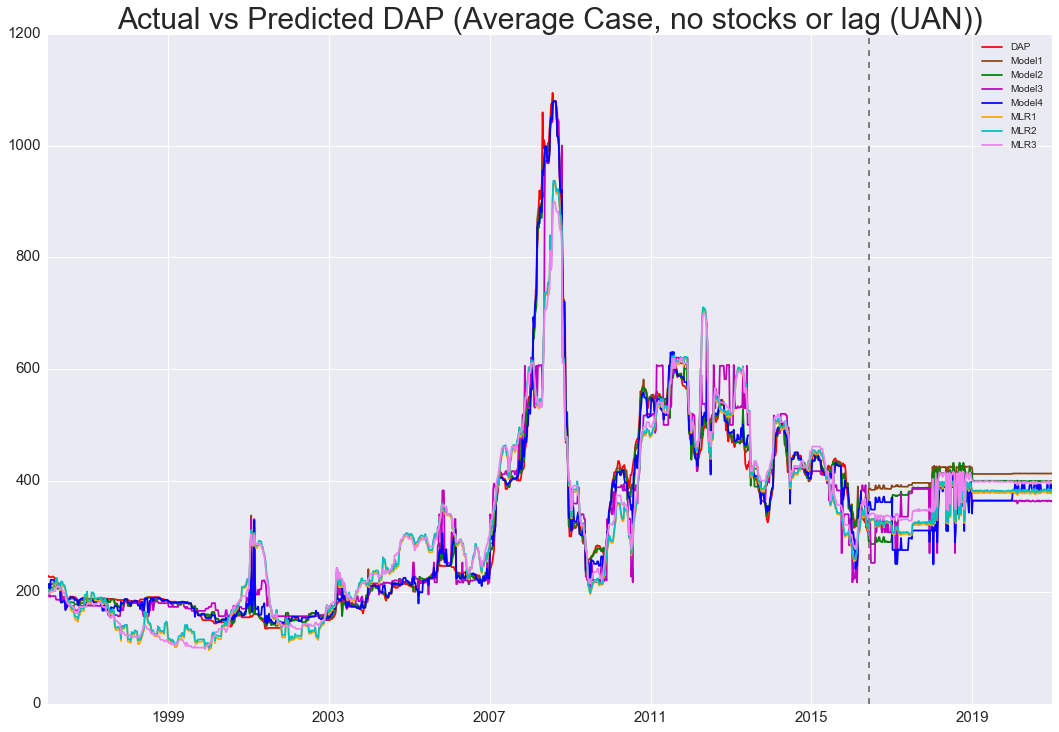

In [125]:
#looking at actual vs predicted 
import matplotlib.pyplot as plt
%matplotlib inline

y1 = (combined['DAP'])
y2 = (combined['Model1'])
y3 = (combined['Model2'])
y4 = (combined['Model3'])
y5 = (combined['Model4'])
y6 = (combined['MLR1'])
y7 = (combined['MLR2'])
y8 = (combined['MLR3'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(y1,'r')
ax.plot(y2,'saddlebrown')
ax.plot(y3,'g')
ax.plot(y4,'m')
ax.plot(y5,'b')
ax.plot(y6,'orange')
ax.plot(y7,'c')
ax.plot(y8,'violet')

plt.axvline(x='2016-06-03', ymin=0, linewidth=2, color='gray',linestyle = '--')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted DAP (Average Case, no stocks or lag (UAN))', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
plt.show()
#looks eradic, probably urea prediction causing that
#may want to smooth monthly in the eratic parts
#maybe in future use uan to see if better since easier to predict, I will do in another notebook most likely

In [126]:
combined.to_csv("C:/Users/msteinme/Documents/DAPmayavgresultsusinguan.csv")

# Best Case
[Top](#Table-of-Contents)

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/DAPmaybest.csv")
df_nostock = data[['Date','UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use','DAP']][0:1065]
df_nostock.tail()
#1/5/1996 - 5/27/2016

,Date,UAN,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP
1060,4/29/2016,212.16,568570.4171,139477.8947,308862.647,325
1061,5/6/2016,209.92,504721.1176,211180.0000,242143.957,330
1062,5/13/2016,194.88,504721.1176,211180.0000,242143.957,320
1063,5/20/2016,194.88,504721.1176,211180.0000,242143.957,311
1064,5/27/2016,190.08,504721.1176,211180.0000,242143.957,308


In [128]:
from datetime import datetime
df_nostock['Date'] = pd.to_datetime(df_nostock['Date'])
date = df_nostock['Date']
print (df_nostock.dtypes)
df_nostock.describe()

Date                 datetime64[ns]
UAN                         float64
Phos_Inv                    float64
Phos_Exports                float64
Phos_Domestic_Use           float64
DAP                         float64
dtype: object


,UAN,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000
mean,183.728826,592872.991634,331393.061376,262331.544877,318.488263
std,96.415215,149325.503909,128496.751265,81424.770029,185.043178
min,58.000000,262900.000000,66943.220000,23156.400000,135.000000
25%,101.200000,482900.000000,235759.760000,211781.780000,184.000000
50%,165.200000,581000.000000,325936.420000,258685.232400,233.000000
75%,256.960000,687000.000000,421719.180000,310977.860000,430.000000
max,514.880000,960960.000000,741042.900000,639856.640000,1095.000000


In [129]:
#model 1
X1_nostock = df_nostock[['UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use']].values
y1_nostock = df_nostock['DAP'].values
X_train1_nostock, X_test1_nostock, y_train1_nostock, y_test1_nostock= train_test_split(X1_nostock,y1_nostock,test_size=0.3,random_state=1)
forest1_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1_nostock.fit(X_train1_nostock, y_train1_nostock)
y_train_pred1_nostock= forest1_nostock.predict(X_train1_nostock)
y_test_pred1_nostock= forest1_nostock.predict(X_test1_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1_nostock, y_train_pred1_nostock),mean_squared_error(y_test1_nostock, y_test_pred1_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1_nostock, y_train_pred1_nostock),r2_score(y_test1_nostock,y_test_pred1_nostock)))
print(forest1_nostock.feature_importances_)

MSE train: 148.740, test: 495.471
R^2 train: 0.996, test: 0.984
[ 0.90262308  0.02808275  0.03039303  0.03890114]


In [130]:
#model 2
X2_nostock = df_nostock[['UAN','Phos_Inv','Phos_Exports']].values
y2_nostock = df_nostock['DAP'].values
X_train2_nostock, X_test2_nostock, y_train2_nostock, y_test2_nostock= train_test_split(X2_nostock,y2_nostock,test_size=0.3,random_state=1)
forest2_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2_nostock.fit(X_train2_nostock, y_train2_nostock)
y_train_pred2_nostock= forest2_nostock.predict(X_train2_nostock)
y_test_pred2_nostock= forest2_nostock.predict(X_test2_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2_nostock, y_train_pred2_nostock),mean_squared_error(y_test2_nostock, y_test_pred2_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2_nostock, y_train_pred2_nostock),r2_score(y_test2_nostock,y_test_pred2_nostock)))
print(forest2_nostock.feature_importances_)

MSE train: 223.685, test: 534.889
R^2 train: 0.994, test: 0.983
[ 0.90818576  0.04593267  0.04588157]


In [131]:
#model 3
X3_nostock = df_nostock[['UAN']].values
y3_nostock = df_nostock['DAP'].values
X_train3_nostock, X_test3_nostock, y_train3_nostock, y_test3_nostock= train_test_split(X3_nostock,y3_nostock,test_size=0.3,random_state=1)
forest3_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3_nostock.fit(X_train3_nostock, y_train3_nostock)
y_train_pred3_nostock= forest3_nostock.predict(X_train3_nostock)
y_test_pred3_nostock= forest3_nostock.predict(X_test3_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3_nostock, y_train_pred3_nostock),mean_squared_error(y_test3_nostock, y_test_pred3_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3_nostock, y_train_pred3_nostock),r2_score(y_test3_nostock,y_test_pred3_nostock)))
print(forest3_nostock.feature_importances_)

MSE train: 2892.682, test: 2887.900
R^2 train: 0.918, test: 0.908
[ 1.]


In [132]:
#model 4
X4_nostock = df_nostock[['UAN','Phos_Domestic_Use']].values
y4_nostock = df_nostock['DAP'].values
X_train4_nostock, X_test4_nostock, y_train4_nostock, y_test4_nostock= train_test_split(X4_nostock,y4_nostock,test_size=0.3,random_state=1)
forest4_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4_nostock.fit(X_train4_nostock, y_train4_nostock)
y_train_pred4_nostock= forest4_nostock.predict(X_train4_nostock)
y_test_pred4_nostock= forest4_nostock.predict(X_test4_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4_nostock, y_train_pred4_nostock),mean_squared_error(y_test4_nostock, y_test_pred4_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4_nostock, y_train_pred4_nostock),r2_score(y_test4_nostock,y_test_pred4_nostock)))
print(forest4_nostock.feature_importances_)

MSE train: 244.516, test: 772.704
R^2 train: 0.993, test: 0.975
[ 0.91775422  0.08224578]


In [133]:
# comparing models that will be used
model1 = forest1_nostock.predict(X1_nostock)
model2 = forest2_nostock.predict(X2_nostock)
model3 = forest3_nostock.predict(X3_nostock)
model4 = forest4_nostock.predict(X4_nostock)
model1 = pd.DataFrame(model1)
model2 = pd.DataFrame(model2)
model3 = pd.DataFrame(model3)
model4 = pd.DataFrame(model4)
mlr1 = -86.6766 + (df_nostock['UAN']*1.8740) + (df_nostock['Phos_Inv']*0.00004392) + (df_nostock['Phos_Exports']*0.0001) - (df_nostock['Phos_Domestic_Use']*0.0000098)
mlr2 = -87.5919 + (df_nostock['UAN']*1.8780) + (df_nostock['Phos_Inv']*0.00004577) + (df_nostock['Phos_Exports']*0.0001)
mlr3 = -3.9131 + (df_nostock['UAN']*1.7548)
df_nostock['MLR1'] = mlr1
df_nostock['MLR2'] = mlr2
df_nostock['MLR3'] = mlr3
df_nostock['Model1'] = model1
df_nostock['Model2'] = model2
df_nostock['Model3'] = model3
df_nostock['Model4'] = model4

df_nostock.head(3)

,Date,UAN,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP,MLR1,MLR2,MLR3,Model1,Model2,Model3,Model4
0,1996-01-05,114.00,599737.1134,464050.9,359287.8629,230,196.183923,200.355158,196.134100,207.562621,211.789393,190.366307,209.814802
1,1996-01-12,114.96,599737.1134,464050.9,359287.8629,228,197.982963,202.158038,197.818708,212.272543,213.098742,198.105471,213.282071
2,1996-01-19,114.96,599737.1134,464050.9,359287.8629,228,197.982963,202.158038,197.818708,212.272543,213.098742,198.105471,213.282071


### Predictions Part

In [134]:
#predictions section 6/3/2016 - 12/25/2020
newpred = data[['Date','UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use']][1065:1304]
newpred1 = data [['UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use']][1065:1304]  #goes with model 1
newpred2 = data[['UAN','Phos_Inv','Phos_Exports']][1065:1304] #goes with model 2 
newpred3 = data[['UAN']][1065:1304] #goes with model 3
newpred4 = data[['UAN','Phos_Domestic_Use']][1065:1304] #goes with model 4
print(newpred.tail(3))
newpred1.head(2)

            Date         UAN    Phos_Inv  Phos_Exports  Phos_Domestic_Use
1301  12/11/2020  275.834027  494836.097   173916.5418        261170.8262
1302  12/18/2020  246.739746  494836.097   173916.5418        261170.8262
1303  12/25/2020  270.717867  494836.097   173916.5418        261170.8262


,UAN,Phos_Inv,Phos_Exports,Phos_Domestic_Use
1065,193.866286,445932.0646,293650.5,131116.7053
1066,202.343595,445932.0646,293650.5,131116.7053


In [135]:
newpred = np.array(newpred)
newpred = pd.DataFrame(newpred)
newpred.columns = ['Date','UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use'] #all variables used except dap
newpred['Date'] = pd.to_datetime(newpred['Date'])
print(newpred.dtypes)
newpred.head()

Date                 datetime64[ns]
UAN                          object
Phos_Inv                     object
Phos_Exports                 object
Phos_Domestic_Use            object
dtype: object


,Date,UAN,Phos_Inv,Phos_Exports,Phos_Domestic_Use
0,2016-06-03,193.866,445932,293650,131117
1,2016-06-10,202.344,445932,293650,131117
2,2016-06-17,204.022,445932,293650,131117
3,2016-06-24,229.015,445932,293650,131117
4,2016-07-01,242.773,445932,293650,131117


In [136]:
# model 1-4 and mLR models
newpred_predicted1 = forest1_nostock.predict(newpred1)
df_new_pred1 = pd.DataFrame(newpred_predicted1)
newpred['Model1'] = df_new_pred1

newpred_predicted2 = forest2_nostock.predict(newpred2)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred['Model2'] = df_new_pred2

newpred_predicted3 = forest3_nostock.predict(newpred3)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred['Model3'] = df_new_pred3

newpred_predicted4 = forest4_nostock.predict(newpred4)
df_new_pred4 = pd.DataFrame(newpred_predicted4)
newpred['Model4'] = df_new_pred4

mlrpredicted1 = -86.6766 + (newpred['UAN']*1.8740) + (newpred['Phos_Inv']*0.00004392) + (newpred['Phos_Exports']*0.0001) - (newpred['Phos_Domestic_Use']*0.0000098)
mlrpredicted2 = -87.5919 + (newpred['UAN']*1.8780) + (newpred['Phos_Inv']*0.00004577) + (newpred['Phos_Exports']*0.0001)
mlrpredicted3 = -3.9131 + (newpred['UAN']*1.7548)

newpred['MLR1'] = mlrpredicted1
newpred['MLR2'] = mlrpredicted2
newpred['MLR3'] = mlrpredicted3

newpred.head(2)

,Date,UAN,Phos_Inv,Phos_Exports,Phos_Domestic_Use,Model1,Model2,Model3,Model4,MLR1,MLR2,MLR3
0,2016-06-03,193.866,445932,293650,131117,349.108168,345.089333,309.232327,309.944893,324.294,326.264,336.283
1,2016-06-10,202.344,445932,293650,131117,356.797335,356.758468,258.946849,322.217488,340.181,342.185,351.159


In [137]:
frames = [df_nostock,newpred]
combined = pd.concat(frames)
combined.tail(2)

,DAP,Date,MLR1,MLR2,MLR3,Model1,Model2,Model3,Model4,Phos_Domestic_Use,Phos_Exports,Phos_Inv,UAN
237,NaN,2020-12-18,412.279,415.826,429.066,423.140749,434.750740,420.161809,402.308705,261171,173917,494836,246.74
238,NaN,2020-12-25,457.214,460.857,471.143,463.232698,459.626787,462.314082,444.627667,261171,173917,494836,270.718


In [138]:
combined = combined[['Date','UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use','DAP','Model1','Model2','Model3','Model4','MLR1','MLR2','MLR3']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use','DAP','Model1','Model2','Model3','Model4','MLR1','MLR2','MLR3']
combined

,Date,UAN,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP,Model1,Model2,Model3,Model4,MLR1,MLR2,MLR3
0,1996-01-05 00:00:00,114,599737,464051,359288,230,207.563,211.789,190.366,209.815,196.184,200.355,196.134
1,1996-01-12 00:00:00,114.96,599737,464051,359288,228,212.273,213.099,198.105,213.282,197.983,202.158,197.819
2,1996-01-19 00:00:00,114.96,599737,464051,359288,228,212.273,213.099,198.105,213.282,197.983,202.158,197.819
3,1996-01-26 00:00:00,115.6,599737,464051,359288,227,204.346,206.259,189.668,207.525,199.182,203.36,198.942
4,1996-02-02 00:00:00,117.2,721480,380515,183702,227,209.035,207.493,190.408,221.397,200.895,203.583,201.749
5,1996-02-09 00:00:00,117.2,721480,380515,183702,227,209.035,207.493,190.408,221.397,200.895,203.583,201.749
6,1996-02-16 00:00:00,117.2,721480,380515,183702,228,209.035,207.493,190.408,221.397,200.895,203.583,201.749
7,1996-02-23 00:00:00,117.2,721480,380515,183702,228,209.035,207.493,190.408,221.397,200.895,203.583,201.749
8,1996-03-01 00:00:00,117.2,883440,434744,157856,227,218.952,212.406,190.408,220.878,213.684,216.419,201.749
9,1996-03-08 00:00:00,117.2,883440,434744,157856,225,218.952,212.406,190.408,220.878,213.684,216.419,201.749


In [139]:
combined.index = combined['Date'].values
combined = combined.drop(['Date'],axis=1)
combined.head(2)

,UAN,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP,Model1,Model2,Model3,Model4,MLR1,MLR2,MLR3
1996-01-05,114,599737,464051,359288,230,207.563,211.789,190.366,209.815,196.184,200.355,196.134
1996-01-12,114.96,599737,464051,359288,228,212.273,213.099,198.105,213.282,197.983,202.158,197.819


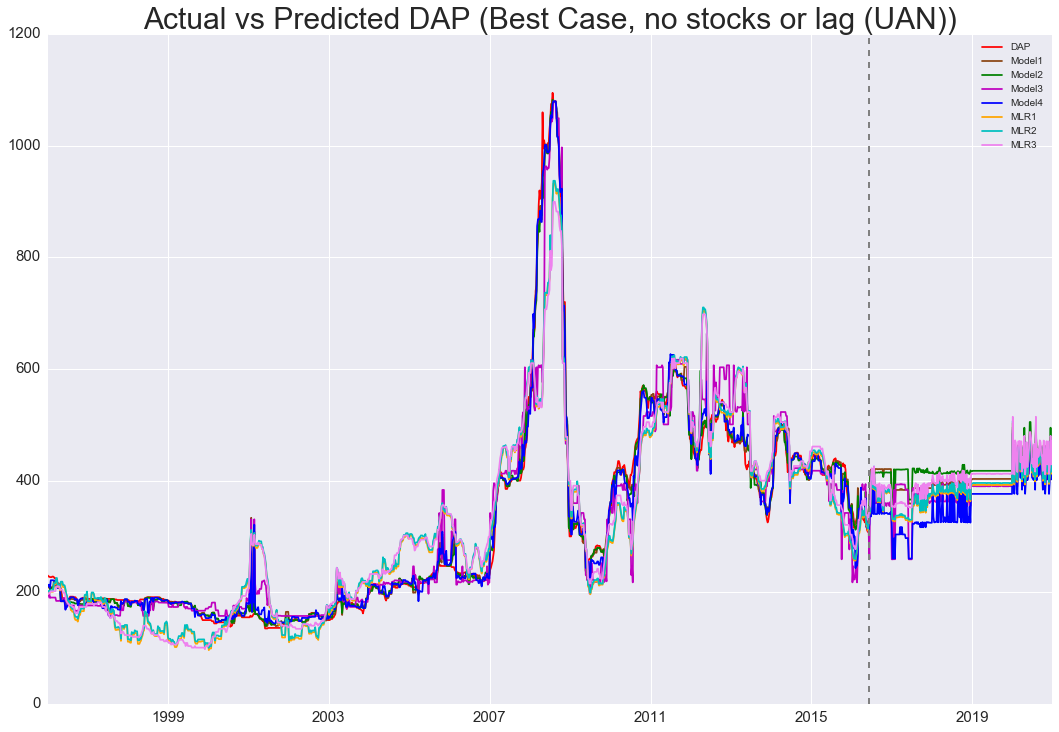

In [140]:
y1 = (combined['DAP'])
y2 = (combined['Model1'])
y3 = (combined['Model2'])
y4 = (combined['Model3'])
y5 = (combined['Model4'])
y6 = (combined['MLR1'])
y7 = (combined['MLR2'])
y8 = (combined['MLR3'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(y1,'r')
ax.plot(y2,'saddlebrown')
ax.plot(y3,'g')
ax.plot(y4,'m')
ax.plot(y5,'b')
ax.plot(y6,'orange')
ax.plot(y7,'c')
ax.plot(y8,'violet')

plt.axvline(x='2016-06-03', ymin=0, linewidth=2, color='gray',linestyle = '--')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted DAP (Best Case, no stocks or lag (UAN))', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
plt.show()

In [141]:
combined.to_csv("C:/Users/msteinme/Documents/DAPmaybestresultsusinguan.csv")

# Worst Case
[Top](#Table-of-Contents)

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/DAPmayworst.csv")
df_nostock = data[['Date','UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use','DAP']][0:1065]
df_nostock.tail()
#1/5/1996 - 5/27/2016

,Date,UAN,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP
1060,4/29/2016,212.16,568570.4171,139477.8947,308862.647,325
1061,5/6/2016,209.92,504721.1176,211180.0000,242143.957,330
1062,5/13/2016,194.88,504721.1176,211180.0000,242143.957,320
1063,5/20/2016,194.88,504721.1176,211180.0000,242143.957,311
1064,5/27/2016,190.08,504721.1176,211180.0000,242143.957,308


In [143]:
from datetime import datetime
df_nostock['Date'] = pd.to_datetime(df_nostock['Date'])
date = df_nostock['Date']
print (df_nostock.dtypes)
df_nostock.describe()

Date                 datetime64[ns]
UAN                         float64
Phos_Inv                    float64
Phos_Exports                float64
Phos_Domestic_Use           float64
DAP                         float64
dtype: object


,UAN,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000
mean,183.728826,592872.991634,331393.061376,262331.544877,318.488263
std,96.415215,149325.503909,128496.751265,81424.770029,185.043178
min,58.000000,262900.000000,66943.220000,23156.400000,135.000000
25%,101.200000,482900.000000,235759.760000,211781.780000,184.000000
50%,165.200000,581000.000000,325936.420000,258685.232400,233.000000
75%,256.960000,687000.000000,421719.180000,310977.860000,430.000000
max,514.880000,960960.000000,741042.900000,639856.640000,1095.000000


In [144]:
#model 1
X1_nostock = df_nostock[['UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use']].values
y1_nostock = df_nostock['DAP'].values
X_train1_nostock, X_test1_nostock, y_train1_nostock, y_test1_nostock= train_test_split(X1_nostock,y1_nostock,test_size=0.3,random_state=1)
forest1_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1_nostock.fit(X_train1_nostock, y_train1_nostock)
y_train_pred1_nostock= forest1_nostock.predict(X_train1_nostock)
y_test_pred1_nostock= forest1_nostock.predict(X_test1_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1_nostock, y_train_pred1_nostock),mean_squared_error(y_test1_nostock, y_test_pred1_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1_nostock, y_train_pred1_nostock),r2_score(y_test1_nostock,y_test_pred1_nostock)))
print(forest1_nostock.feature_importances_)

MSE train: 157.842, test: 502.311
R^2 train: 0.996, test: 0.984
[ 0.90274603  0.02498613  0.03302606  0.03924179]


In [145]:
#model 2
X2_nostock = df_nostock[['UAN','Phos_Inv','Phos_Exports']].values
y2_nostock = df_nostock['DAP'].values
X_train2_nostock, X_test2_nostock, y_train2_nostock, y_test2_nostock= train_test_split(X2_nostock,y2_nostock,test_size=0.3,random_state=1)
forest2_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2_nostock.fit(X_train2_nostock, y_train2_nostock)
y_train_pred2_nostock= forest2_nostock.predict(X_train2_nostock)
y_test_pred2_nostock= forest2_nostock.predict(X_test2_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2_nostock, y_train_pred2_nostock),mean_squared_error(y_test2_nostock, y_test_pred2_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2_nostock, y_train_pred2_nostock),r2_score(y_test2_nostock,y_test_pred2_nostock)))
print(forest2_nostock.feature_importances_)

MSE train: 240.188, test: 534.243
R^2 train: 0.993, test: 0.983
[ 0.90880675  0.04442543  0.04676781]


In [146]:
#model 3
X3_nostock = df_nostock[['UAN']].values
y3_nostock = df_nostock['DAP'].values
X_train3_nostock, X_test3_nostock, y_train3_nostock, y_test3_nostock= train_test_split(X3_nostock,y3_nostock,test_size=0.3,random_state=1)
forest3_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3_nostock.fit(X_train3_nostock, y_train3_nostock)
y_train_pred3_nostock= forest3_nostock.predict(X_train3_nostock)
y_test_pred3_nostock= forest3_nostock.predict(X_test3_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3_nostock, y_train_pred3_nostock),mean_squared_error(y_test3_nostock, y_test_pred3_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3_nostock, y_train_pred3_nostock),r2_score(y_test3_nostock,y_test_pred3_nostock)))
print(forest3_nostock.feature_importances_)

MSE train: 2887.886, test: 2916.883
R^2 train: 0.919, test: 0.907
[ 1.]


In [147]:
#model 4
X4_nostock = df_nostock[['UAN','Phos_Domestic_Use']].values
y4_nostock = df_nostock['DAP'].values
X_train4_nostock, X_test4_nostock, y_train4_nostock, y_test4_nostock= train_test_split(X4_nostock,y4_nostock,test_size=0.3,random_state=1)
forest4_nostock = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4_nostock.fit(X_train4_nostock, y_train4_nostock)
y_train_pred4_nostock= forest4_nostock.predict(X_train4_nostock)
y_test_pred4_nostock= forest4_nostock.predict(X_test4_nostock)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4_nostock, y_train_pred4_nostock),mean_squared_error(y_test4_nostock, y_test_pred4_nostock)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4_nostock, y_train_pred4_nostock),r2_score(y_test4_nostock,y_test_pred4_nostock)))
print(forest4_nostock.feature_importances_)

MSE train: 238.099, test: 791.693
R^2 train: 0.993, test: 0.975
[ 0.91868757  0.08131243]


In [148]:
# comparing models that will be used
model1 = forest1_nostock.predict(X1_nostock)
model2 = forest2_nostock.predict(X2_nostock)
model3 = forest3_nostock.predict(X3_nostock)
model4 = forest4_nostock.predict(X4_nostock)
model1 = pd.DataFrame(model1)
model2 = pd.DataFrame(model2)
model3 = pd.DataFrame(model3)
model4 = pd.DataFrame(model4)
mlr1 = -86.6766 + (df_nostock['UAN']*1.8740) + (df_nostock['Phos_Inv']*0.00004392) + (df_nostock['Phos_Exports']*0.0001) - (df_nostock['Phos_Domestic_Use']*0.0000098)
mlr2 = -87.5919 + (df_nostock['UAN']*1.8780) + (df_nostock['Phos_Inv']*0.00004577) + (df_nostock['Phos_Exports']*0.0001)
mlr3 = -3.9131 + (df_nostock['UAN']*1.7548)
df_nostock['MLR1'] = mlr1
df_nostock['MLR2'] = mlr2
df_nostock['MLR3'] = mlr3
df_nostock['Model1'] = model1
df_nostock['Model2'] = model2
df_nostock['Model3'] = model3
df_nostock['Model4'] = model4

df_nostock.head(3)

,Date,UAN,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP,MLR1,MLR2,MLR3,Model1,Model2,Model3,Model4
0,1996-01-05,114.00,599737.1134,464050.9,359287.8629,230,196.183923,200.355158,196.134100,216.117520,209.193508,187.482836,210.652075
1,1996-01-12,114.96,599737.1134,464050.9,359287.8629,228,197.982963,202.158038,197.818708,220.215859,211.035067,196.930389,215.904098
2,1996-01-19,114.96,599737.1134,464050.9,359287.8629,228,197.982963,202.158038,197.818708,220.215859,211.035067,196.930389,215.904098


### Predictions Part

In [149]:
#predictions section 6/3/2016 - 12/25/2020
newpred = data[['Date','UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use']][1065:1304]
newpred1 = data [['UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use']][1065:1304]  #goes with model 1
newpred2 = data[['UAN','Phos_Inv','Phos_Exports']][1065:1304] #goes with model 2 
newpred3 = data[['UAN']][1065:1304] #goes with model 3
newpred4 = data[['UAN','Phos_Domestic_Use']][1065:1304] #goes with model 4
print(newpred.tail(3))
newpred1.head(2)

            Date         UAN     Phos_Inv  Phos_Exports  Phos_Domestic_Use
1301  12/11/2020  188.465424  604799.6741   142295.3524        213685.2214
1302  12/18/2020  188.388624  604799.6741   142295.3524        213685.2214
1303  12/25/2020  188.452624  604799.6741   142295.3524        213685.2214


,UAN,Phos_Inv,Phos_Exports,Phos_Domestic_Use
1065,177.629973,545028.0789,240259.5,107277.3043
1066,197.683362,545028.0789,240259.5,107277.3043


In [150]:
newpred = np.array(newpred)
newpred = pd.DataFrame(newpred)
newpred.columns = ['Date','UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use'] #all variables used except dap
newpred['Date'] = pd.to_datetime(newpred['Date'])
print(newpred.dtypes)
newpred.head()

Date                 datetime64[ns]
UAN                          object
Phos_Inv                     object
Phos_Exports                 object
Phos_Domestic_Use            object
dtype: object


,Date,UAN,Phos_Inv,Phos_Exports,Phos_Domestic_Use
0,2016-06-03,177.63,545028,240260,107277
1,2016-06-10,197.683,545028,240260,107277
2,2016-06-17,192.845,545028,240260,107277
3,2016-06-24,175.448,545028,240260,107277
4,2016-07-01,171.939,545028,240260,107277


In [151]:
# model 1-4 and mLR models
newpred_predicted1 = forest1_nostock.predict(newpred1)
df_new_pred1 = pd.DataFrame(newpred_predicted1)
newpred['Model1'] = df_new_pred1

newpred_predicted2 = forest2_nostock.predict(newpred2)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred['Model2'] = df_new_pred2

newpred_predicted3 = forest3_nostock.predict(newpred3)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred['Model3'] = df_new_pred3

newpred_predicted4 = forest4_nostock.predict(newpred4)
df_new_pred4 = pd.DataFrame(newpred_predicted4)
newpred['Model4'] = df_new_pred4

mlrpredicted1 = -86.6766 + (newpred['UAN']*1.8740) + (newpred['Phos_Inv']*0.00004392) + (newpred['Phos_Exports']*0.0001) - (newpred['Phos_Domestic_Use']*0.0000098)
mlrpredicted2 = -87.5919 + (newpred['UAN']*1.8780) + (newpred['Phos_Inv']*0.00004577) + (newpred['Phos_Exports']*0.0001)
mlrpredicted3 = -3.9131 + (newpred['UAN']*1.7548)

newpred['MLR1'] = mlrpredicted1
newpred['MLR2'] = mlrpredicted2
newpred['MLR3'] = mlrpredicted3

newpred.head(2)

,Date,UAN,Phos_Inv,Phos_Exports,Phos_Domestic_Use,Model1,Model2,Model3,Model4,MLR1,MLR2,MLR3
0,2016-06-03,177.63,545028,240260,107277,380.289091,341.250788,298.733870,360.244444,293.114,294.969,307.792
1,2016-06-10,197.683,545028,240260,107277,392.339488,334.642478,251.729681,354.282778,330.694,332.629,342.982


In [152]:
frames = [df_nostock,newpred]
combined = pd.concat(frames)
combined.tail(2)

,DAP,Date,MLR1,MLR2,MLR3,Model1,Model2,Model3,Model4,Phos_Domestic_Use,Phos_Exports,Phos_Inv,UAN
237,NaN,2020-12-18,305.062,308.113,326.671,394.924595,366.623368,383.816705,310.098752,213685,142295,604800,188.389
238,NaN,2020-12-25,305.182,308.233,326.784,394.924595,366.623368,383.816705,310.098752,213685,142295,604800,188.453


In [153]:
combined = combined[['Date','UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use','DAP','Model1','Model2','Model3','Model4','MLR1','MLR2','MLR3']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','UAN','Phos_Inv','Phos_Exports','Phos_Domestic_Use','DAP','Model1','Model2','Model3','Model4','MLR1','MLR2','MLR3']
combined

,Date,UAN,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP,Model1,Model2,Model3,Model4,MLR1,MLR2,MLR3
0,1996-01-05 00:00:00,114,599737,464051,359288,230,216.118,209.194,187.483,210.652,196.184,200.355,196.134
1,1996-01-12 00:00:00,114.96,599737,464051,359288,228,220.216,211.035,196.93,215.904,197.983,202.158,197.819
2,1996-01-19 00:00:00,114.96,599737,464051,359288,228,220.216,211.035,196.93,215.904,197.983,202.158,197.819
3,1996-01-26 00:00:00,115.6,599737,464051,359288,227,216.736,207.364,190.183,205.455,199.182,203.36,198.942
4,1996-02-02 00:00:00,117.2,721480,380515,183702,227,209.951,204.611,191.983,220.779,200.895,203.583,201.749
5,1996-02-09 00:00:00,117.2,721480,380515,183702,227,209.951,204.611,191.983,220.779,200.895,203.583,201.749
6,1996-02-16 00:00:00,117.2,721480,380515,183702,228,209.951,204.611,191.983,220.779,200.895,203.583,201.749
7,1996-02-23 00:00:00,117.2,721480,380515,183702,228,209.951,204.611,191.983,220.779,200.895,203.583,201.749
8,1996-03-01 00:00:00,117.2,883440,434744,157856,227,216.995,214.252,191.983,222.309,213.684,216.419,201.749
9,1996-03-08 00:00:00,117.2,883440,434744,157856,225,216.995,214.252,191.983,222.309,213.684,216.419,201.749


In [154]:
combined.index = combined['Date'].values
combined = combined.drop(['Date'],axis=1)
combined.head(2)

,UAN,Phos_Inv,Phos_Exports,Phos_Domestic_Use,DAP,Model1,Model2,Model3,Model4,MLR1,MLR2,MLR3
1996-01-05,114,599737,464051,359288,230,216.118,209.194,187.483,210.652,196.184,200.355,196.134
1996-01-12,114.96,599737,464051,359288,228,220.216,211.035,196.93,215.904,197.983,202.158,197.819


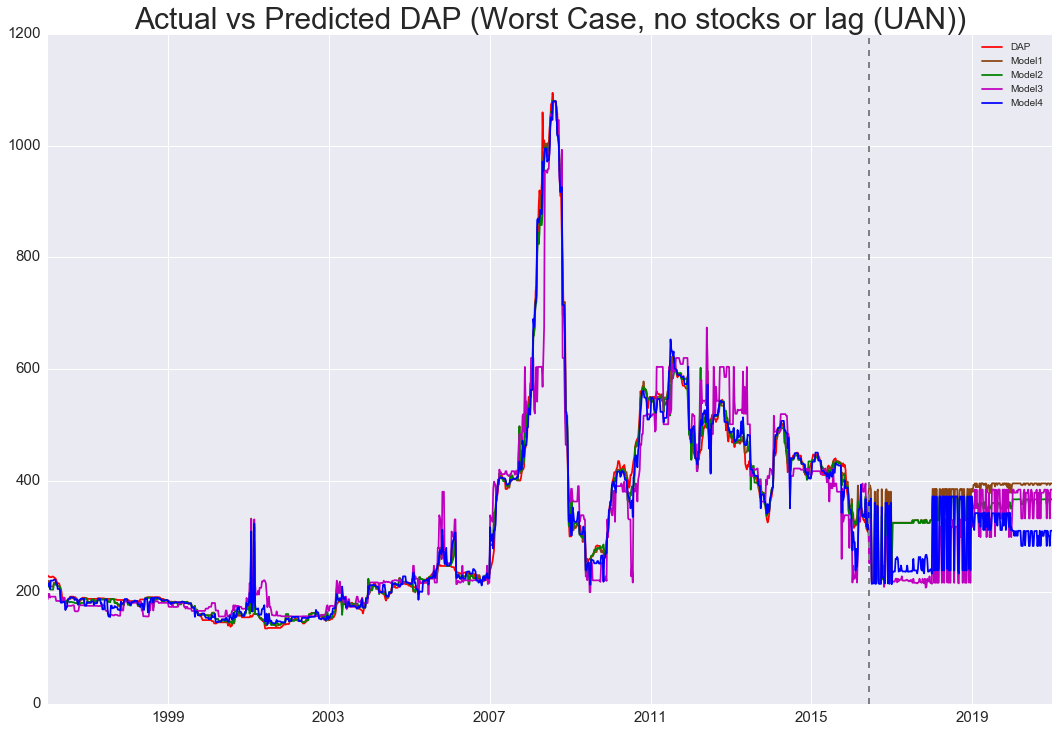

In [157]:
y1 = (combined['DAP'])
y2 = (combined['Model1'])
y3 = (combined['Model2'])
y4 = (combined['Model3'])
y5 = (combined['Model4'])
y6 = (combined['MLR1'])
y7 = (combined['MLR2'])
y8 = (combined['MLR3'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(y1,'r')
ax.plot(y2,'saddlebrown')
ax.plot(y3,'g')
ax.plot(y4,'m')
ax.plot(y5,'b')
ax.plot(y6,'orange')
ax.plot(y7,'c')
ax.plot(y8,'violet')

plt.axvline(x='2016-06-03', ymin=0, linewidth=2, color='gray',linestyle = '--')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted DAP (Worst Case, no stocks or lag (UAN))', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
plt.show()

In [156]:
combined.to_csv("C:/Users/msteinme/Documents/DAPmayworstresultsusinguan.csv")

# I will want to use lead/lag and stocks, however I need to have the stocks predicted first before I can predict DAP more accurately